## Comparison of Modelled and Observed Marine NPP
***********************************************************

Based on the Orginal script in Matlab by Tyler Rohr

### TODO:
- Change input file (.mat) to netcdf, add Copernicus Python downloader
- Add Taylor diagram

 *********************************************************** 
March 2025, Annika Oetjens


**Introduction:**
Primary Production is the photosynthetic transformation of inorganic carbon (e.g. CO2) into organic matter that can be used to build biomass or be broken down to create energy. Net Primary Production is the net production of biomass by autotrophic organisms after subtracting out the amount of biomass they use to for their own energy needs (i.e. autotrophic respiration).

Marine algae (i.e. phytoplankton) are responsible for about half the NPP on Earth despite on comprising only about 1% of the total biomass at any given time! That’s because -- unlike trees on land-- they live in a highly dynamic fluid environment with a very high turnover time. They grow fast but die fast too. Ultimately, phytoplankton NPP constitutes the base of the marine food-web and is tightly related to strength of the biological pump, which can create a DIC gradient in the ocean and lead to order 100 ppm changes in the atmospheric CO2 concentrations.

Thus, understanding how NPP will change in future climate states is critical to understanding Earth’s capacity to feed a growing population and buffer a changing climate. Earth System Models (ESMs) used by the IPCC to anticipate different climate scenarios account for this by including a marine biogeochemical component model that simulates marine NPP. Unfortunately, there is a huge amount of uncertainty in future projections of NPP (Tagliabue et al., 2021). Even under identical emissions forcing scenarios, state-of-the-art Earth system models can’t even agree on the direction(!), no less the magnitude, of changes to NPP in a warmer ocean (Figure 1). While it is impossible to know which model prediction is ‘right’, the first step is to evaluate how well they can create present day conditions. 

In this lab you will pick two models and one remote sensing product to compare the seasonal evolution and spatial distribution between the models and the observations.

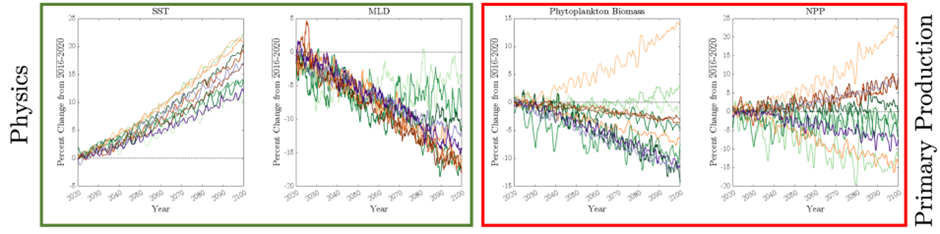
Figure 1. Projections of physical (MLD, SST) and biological (Biomass, NPP) variables for all 11 models considered in this lab under SSP585 forcing.


### Section 1: Pick and Download Your Data 
Pick your Models. What models do you want to look at? I processed the NPP climatologies from 11 prominent ESMs. Each one is averaged from about 1750 to 1900, long enough average out ENSO variability, but stopping before the anthropogenic signal gets too big. These are all available to download on the Mylo webpage. If you want to download data from different models or variables for your own research, check out the information in Appendix 1 on MyLO.

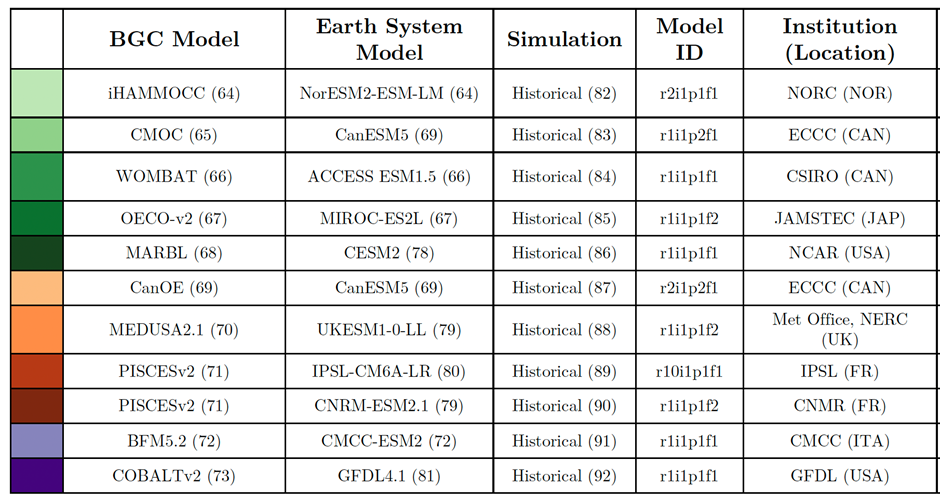

Table 1. List of BGC models and their associated Earth System Model.

The table above provides a list of all the available models. Each ESM is built out of several different model components: one for each part of the earth system: the marine BGC, the ocean physics, the atmosphere, etc. The first column in Table 1 lists the name of the BGC model component, the second lists the broader Earth system model, and the fifth lists the organization that runs it. The third and fourth give details on the specific simulation and ensemble member. In this case all simulations were forced with historical atmospheric CO2 concentrations. The ensemble member relates to small variations in the initial conditions the run was initialized with. Often models will be run from many different sets of initial conditions to understand ‘natural’ variability. If you are interested in any more details on the models or experiments the citations included refer to the reference list found in Rohr et al (2023).

*************************

**Question 1:** 
Why do you think I have provided two outputs for the BGC model called PISCESv2? How might do you think they may or may not be different?

**********************************


You might wonder how all these BGC models differ. There are quite a lot of ways, ranging from nutrients included to the way particles sink (Seferian et al., 2020). But the way that might be the most important for NPP is the composition of the food web. That is, how many types of phytoplankton and zooplankton they include, and how they interact. Check out the schematic below in Figure 2 to get an idea of the different food webs in the different BGC models.

* Models with multiple types of phytoplankton
typically differentiate them based on their growth rates and light and nutrient requirements. Small phytoplankton typically grow really fast, need lots of light and not so many nutrients. Big phytoplankton (like diatoms) grow slower, need more nutrients, but can survive at lower light levels. 

* 
Models with multiple types of zooplankt n typically differentiate them based on what they like to eat and how fast they can eat it. Smaller zooplankton typically prefer small phytoplankton and graze on them really fast. Larger zooplankton typically can consume the bigger phytoplankton but must eat them at a much slower rate
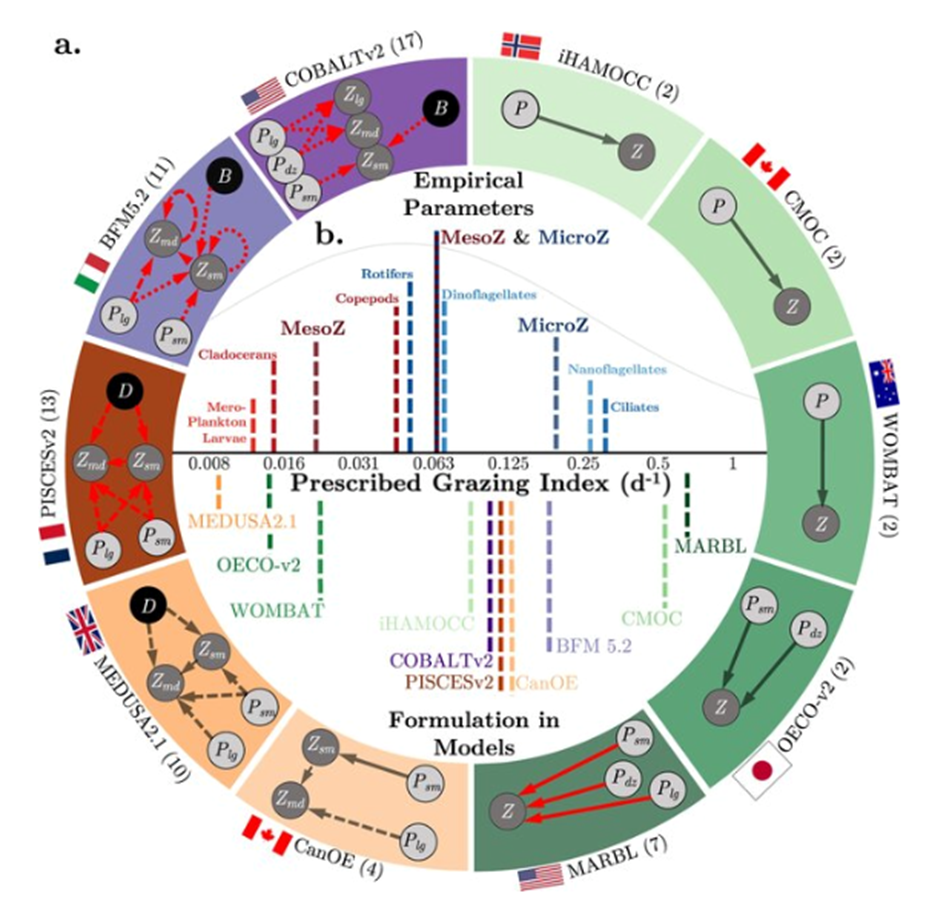

Figure 2. A) The marine food webs represented in 10 CMIP6-class BGC models are presented in clockwise order of increasing complexity. Next to the name of each BGC model is the number of parameters required to describe grazing. Grazing relationships (arrows) are solid for single-prey responses, dashed for multi-prey responses with fixed preferences, and dotted for multi-prey responses with active switching. Red arrows indicate temperature sensitivity. Green, red/orange, and purple color schemes refer to models with 1, 2, or actively switching zooplankton, respectively. Hue scales qualitatively with complexity. PFTs have been generalized into small (nano-, small, non-diatom, or nanoflagelate), large (large, diatoms), or diazotrophs for phytoplankton (P) and small (micro-, small), medium (meso-, medium), or large (macro-, large) for zooplankton (Z). Bacteria (B) and Detritus (D) are included when available as prey. B) In the inner panel the Prescribed Grazing Index is plotted for different models and observations. This metric reflects how fast the average zooplankton in that model or observed functional group grazes on the global median plankton population. Figure from Rohr et al (2023)..




*************************

**Question 2:** 
Based on the descriptions above, in a model like CanOE with 2 types phytoplankton and 2 types zooplankton, a small and large of each, how do you think the populations of each might change in a changing climate.

**********************************

*************************

**Question 3:** 
Have a look at the schematic in Figure 2. Based on the described food webs which models do you think simulate food-webs that respond most accurately to climate change and why?

**********************************

**Pick your Remote Sensing Data.** What Remote Sensing Product do you want to look at? VGPM and CbPM are two different algorithms used to compute NPP from remote sensing data and various empirical relationships. I have created ~10 year climatologies for each, but check out Appendix 2 to learn more how to download them yourself. As for the difference between the models? To estimate NPP, the depth-integrated rate of productivity, you need three things: a rate term (i.e. how fast phytoplankton are dividing), a concentration (how many are doing the dividing), and a volume function that tells you how the surface concentration changes with depth (as the satellite can only see the surface concentration). See Table 2 (also on Mylo) for a brief description of how VGPM and CbPM differ in these regards.

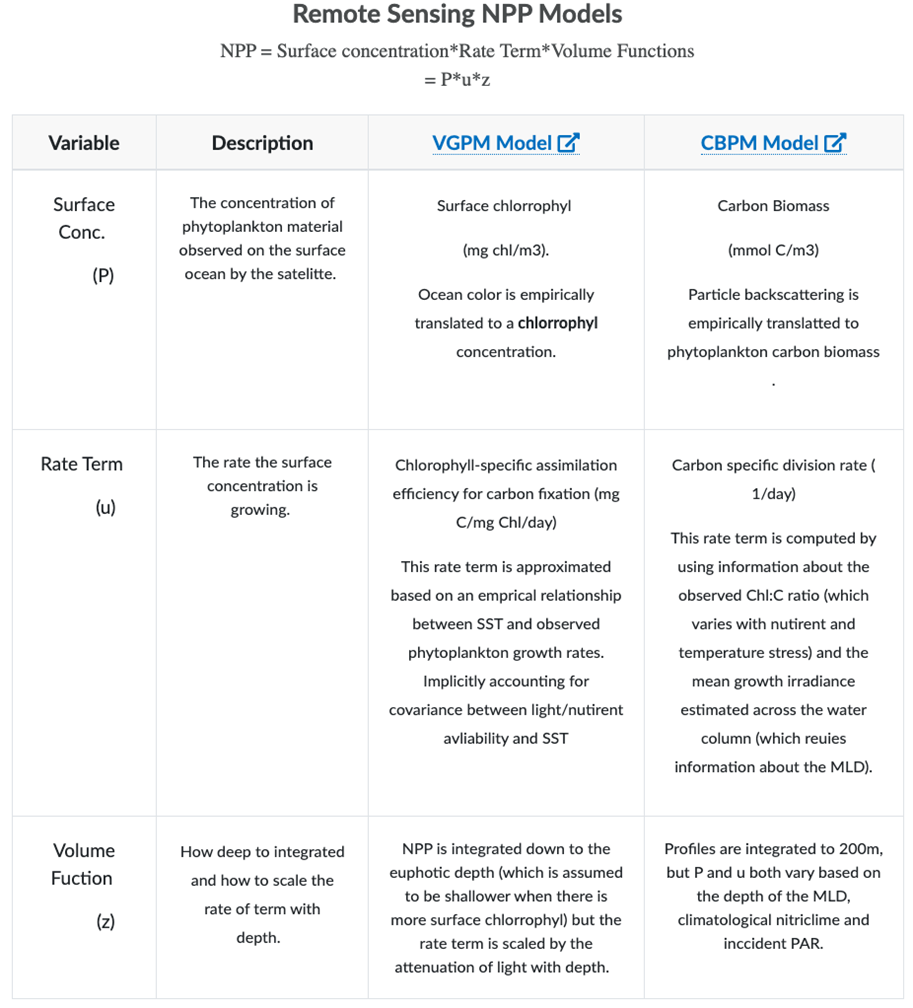
Table 2. Descriptions of two prominent Remote Sensing NPP 'models' 

*********************
**Question 4:**
What is the key satellite measurement utilized in CbPM that differentiates it from VGPM? 

*****************************


**Setup and Download.** Once you have picked your data sources, download your:   

2 selected BGC model outputs, 1 selected remote sensing datas.. 

Make sure to put all these files in the same fold)n 1’. Make sure to read all the comments in the script as you move along, as some of the line of code need to be chaged! 


In [5]:
# Section 1.1: Download data, rename path and file names

# import packages
import numpy as np
import scipy.io as sio
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import cmocean
import sys 
import os
import glob

# current directory
os.getcwd()

# path to where the datafiles live
path = '/../../../g/data/jk72/ao2582/QMS512/'
# list content of that folder
glob.glob(path + '*.mat')

sys.path.append(os.path.abspath(path))
# Import from other scipts
from Allstats import *

In [6]:
# ToDo: insert file names and label names
m_1 = ['CanESM5_CanOE.mat', 'Wombat']
m_2 = ['CNMR.mat', 'PISCESv2']
obs = ['RS_CbPM.mat', 'CbPM']


# ======= Load Data =======

model_1 = sio.loadmat(glob.glob(path + m_1[0])[0])  # Load the first model file
Name_Model_1 = m_1[1]

model_2 = sio.loadmat(glob.glob(path + m_2[0])[0])  # Load the second model file
Name_Model_2 = m_2[1]

obs_data = sio.loadmat(glob.glob(path + obs[0])[0])  # Load the remote sensing file
Name_obs = obs[1]


# ======= Assign Variables using xarray =======
# this will change once using netcdf files

# Model 1

lon_model_1 = model_1['Lon'].squeeze()
lon_model_1[lon_model_1 < 0] += 360

Area_model_1 = xr.DataArray(model_1['Cell_Area'], dims=['lat', 'lon'])                         # Units: m^2
NPP_model_1_ = xr.DataArray(model_1['intpp'],                                                  # Units: mmolC/m2/d 
                            dims=['time', 'lat', 'lon'], 
                            coords={'time': np.arange(model_1['intpp'].shape[0])+1, # array from 1 to 12
                                    'lat': model_1['Lat'].squeeze()[:,0], 
                                    'lon': lon_model_1[0,:]})
NPP_model_1 = NPP_model_1_.sortby('lon')
del(NPP_model_1_)

# Model 2

lon_model_2 = model_2['Lon'].squeeze()
lon_model_2[lon_model_2 < 0] += 360
Area_model_2 = xr.DataArray(model_2['Cell_Area'], dims=['lat', 'lon'])                          # Units: m^2
NPP_model_2_ = xr.DataArray(model_2['intpp'],                                                   # Units: mmolC/m2/d  
                            dims=['time', 'lat', 'lon'], 
                            coords={'time': np.arange(model_2['intpp'].shape[0])+1,
                                    'lat':  model_2['Lat'].squeeze()[:,0], 
                                    'lon': lon_model_2[0,:]})
NPP_model_2 = NPP_model_2_.sortby('lon')
del(NPP_model_2_)

# Observations
lon_obs = obs_data['Lon'].squeeze()
lon_obs[lon_obs < 0] += 360
NPP_obs_ = xr.DataArray(obs_data['intpp'] / 12,  # Convert from mgC to mmolC
                       dims=['time', 'lat', 'lon'], 
                       coords={'time': np.arange(obs_data['intpp'].shape[0]),
                               'lat': obs_data['Lat'].squeeze()[:,0], 
                               'lon': lon_obs[0,:]})

NPP_obs = NPP_obs_.sortby('lon')
del(NPP_obs_)
# Area calculation for obs
Area_obs = np.cos(np.radians(obs_data['Lat'].squeeze())) * np.ones_like(obs_data['Lat'].squeeze()) * (111.1 / 6) * 1000 * (111.1 / 6) * 1000
Area_obs = xr.DataArray(Area_obs, dims=['lat', 'lon'], coords={'lat': obs_data['Lat'].squeeze()[:,0], 'lon': lon_obs[0,:]})

print('Model and Obs Data Downloaded')
# Print the sizes to verify
print(f'\nThe size of NPP_model_1 is: {NPP_model_1.shape}')
print(f'\nThe size of NPP_model_2 is: {NPP_model_2.shape}')



Model and Obs Data Downloaded

The size of NPP_model_1 is: (12, 291, 360)

The size of NPP_model_2 is: (12, 294, 362)


************************
**Question 5:** What are the dimensions of the model out matrixes.
***********************

**************************
**Question 6:** Modify the following section to specify and plot a model and month to plot. 

****************************

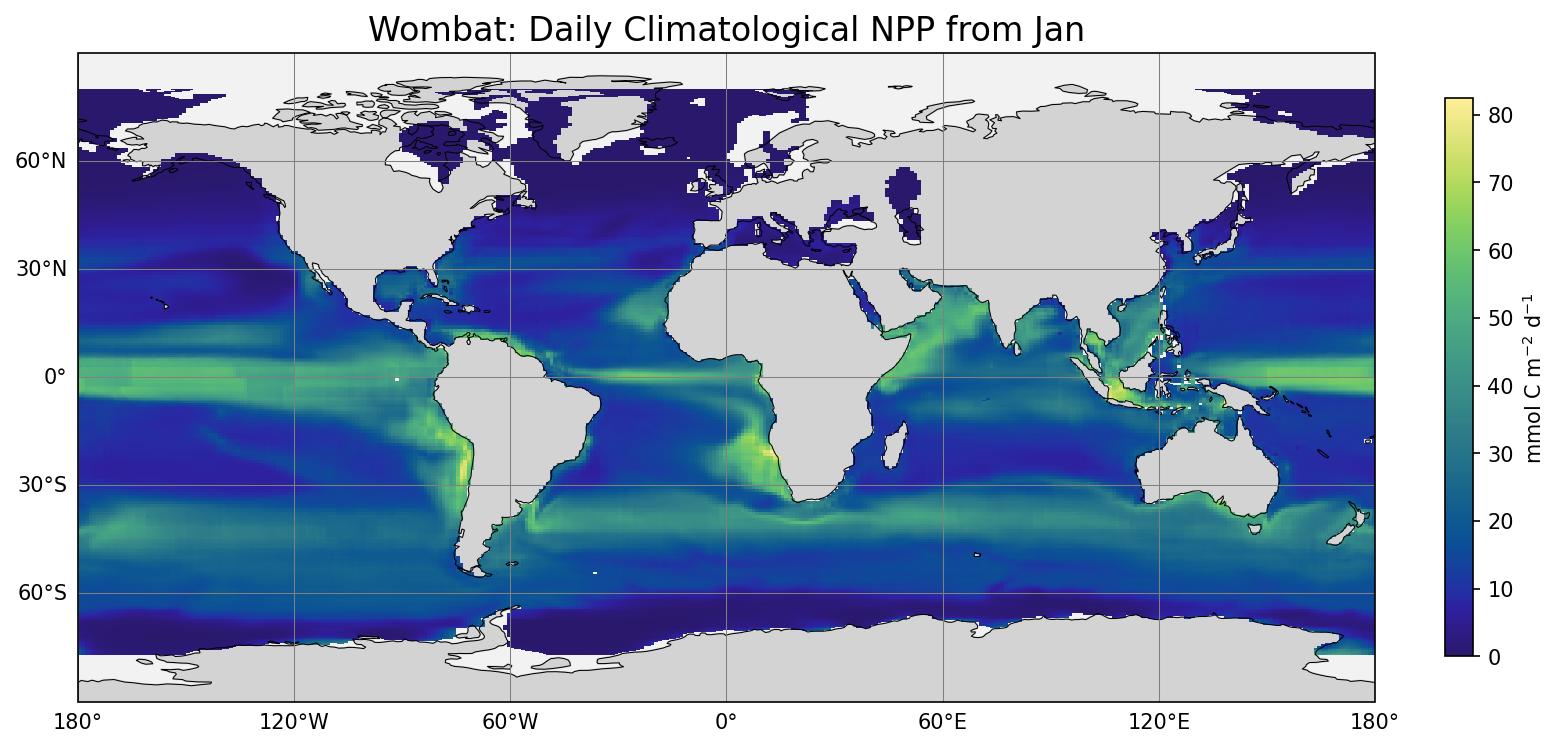

In [7]:
#Section 1.2: Try Plotting your data for a given month 
# Month labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# ToDo: pick a month (1:Jan, 2:Feb,...)
mon = 1  # Pick a Month
# ToDo: pick a model (NPP_model_1 or NPP_model_2)
ds = NPP_model_1

plotvar = ds.isel(time=mon-1)  # Selecting data for the chosen month
global_extent = [-180,180,-90,90]

# Plot
fig = plt.figure(figsize=(12, 6), num=1, clear=True, dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color="lightgray")
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.set_extent(global_extent, ccrs.PlateCarree())
ax.set_facecolor([0.95, 0.95, 0.95])
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='-')
gl.right_labels = False
gl.top_labels = False

p = ax.pcolormesh(ds.lon, ds.lat, plotvar, cmap = cmocean.cm.haline)

# Colorbar
cb = plt.colorbar(p, orientation='vertical', pad=0.05, fraction=0.02)
cb.set_label('mmol C m$^{-2}$ d$^{-1}$')

# Title
plt.title(f'{Name_Model_1}: Daily Climatological NPP from {months[mon - 1]}', fontsize=16)
#plt.savefig(path + f'{Name_Model_1}: Daily Climatological NPP from {months[mon - 1]}.jpg')
plt.show()

####  Section 2: Global, Annual NPP 
Run the next section to plot the distribution of Mean Annual NPP and Globally Integrated Productivity for each data set


The size of NPP_model_1 is: (12, 291, 360)

The size of Mean_Annual_NPP_model_1 is: (291, 360)


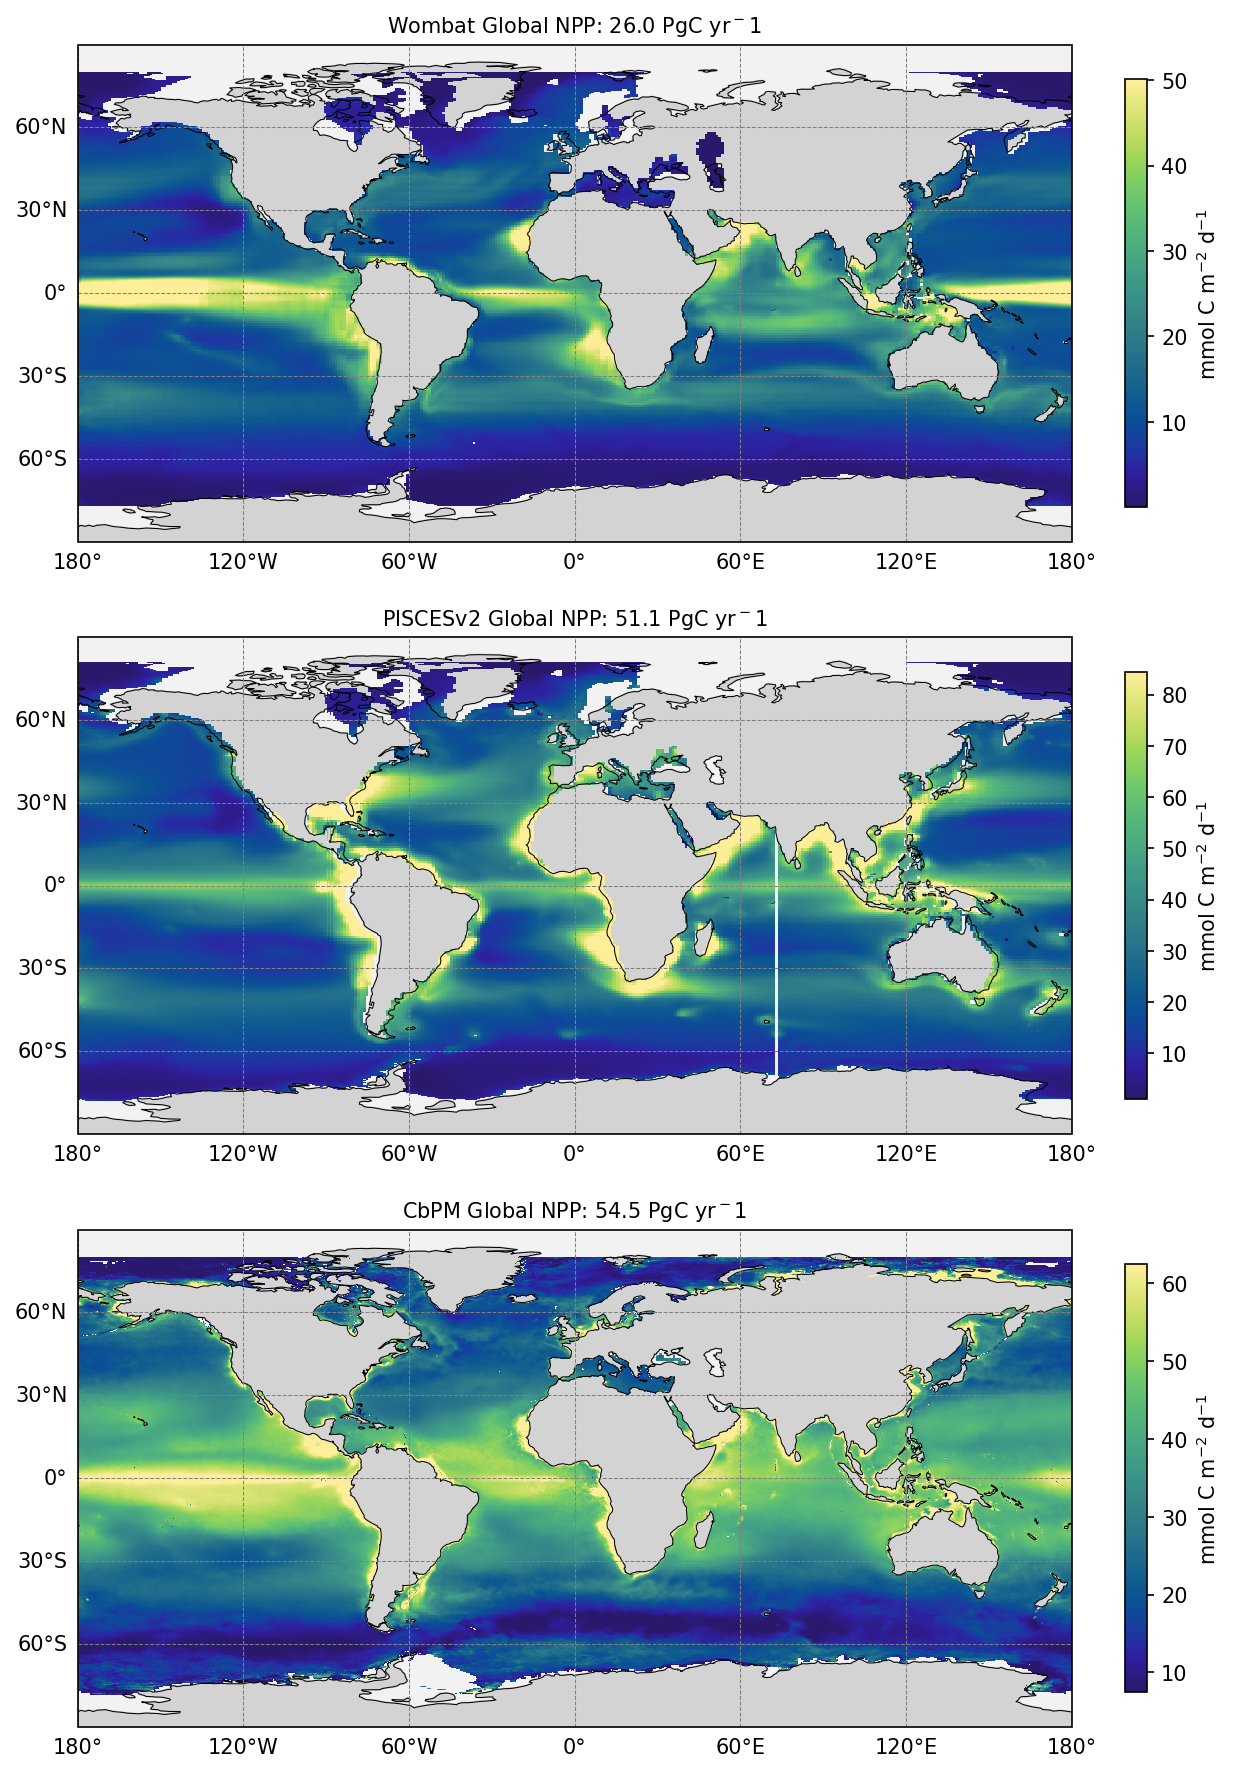

In [8]:
# Part 2.1

# Part A. Compute the annual mean NPP
# Take the mean over the time dimension
Mean_Annual_NPP_model_1 = NPP_model_1.mean(dim='time', skipna=True)
Mean_Annual_NPP_model_2 = NPP_model_2.mean(dim='time', skipna=True)
Mean_Annual_NPP_obs = NPP_obs.mean(dim='time', skipna=True)

# Part B. Compute the globally integrated NPP
# First, convert mmolC to PgC (multiply by 365 days, 12 months, and convert to Pg)
# Integrate over the space (lat, lon) dimensions using the Area values
Total_NPP_model_1 = (Mean_Annual_NPP_model_1 * Area_model_1).sum(dim=['lat', 'lon'], skipna=True) * 365 * 12 / 10**18
Total_NPP_model_2 = (Mean_Annual_NPP_model_2 * Area_model_2).sum(dim=['lat', 'lon'], skipna=True) * 365 * 12 / 10**18
Total_NPP_obs = (Mean_Annual_NPP_obs * Area_obs).sum(dim=['lat', 'lon'], skipna=True) * 365 * 12 / 10**18

# Print the sizes to verify
print(f'\nThe size of NPP_model_1 is: {NPP_model_1.shape}')
print(f'\nThe size of Mean_Annual_NPP_model_1 is: {Mean_Annual_NPP_model_1.shape}')

# Part C. Plot Global distribution with global annual integral

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 12), dpi=150, subplot_kw={'projection': ccrs.PlateCarree()}, num=1, clear=True)

# Set color bounds dynamically based on the range of all three datasets, ignore nans
cbounds = np.nanpercentile(np.concatenate([Mean_Annual_NPP_model_1.values.flatten(),
                                           Mean_Annual_NPP_model_2.values.flatten(),
                                           Mean_Annual_NPP_obs.values.flatten()]), [3, 97])

# ToDO: decide on whether you want indivual cbounds for each subplot or a common scale
individual_cbounds = True
if individual_cbounds == True:
    # for individual cbounds:
    cbounds_1 = np.nanpercentile(Mean_Annual_NPP_model_1.values.flatten(), [3, 97])
    cbounds_2 = np.nanpercentile(Mean_Annual_NPP_model_2.values.flatten(), [3, 97])
    cbounds_3 = np.nanpercentile(Mean_Annual_NPP_obs.values.flatten(), [3, 97])
else:
    cbounds_1 = cbounds
    cbounds_2 = cbounds
    cbounds_3 = cbounds



# Subplot 1: Model 1 Mean Annual NPP
ax[0].add_feature(cfeature.LAND, color="lightgray")
ax[0].add_feature(cfeature.COASTLINE, linewidth=0.5)
ax[0].set_extent(global_extent, ccrs.PlateCarree())
ax[0].set_facecolor([0.95, 0.95, 0.95])
gl = ax[0].gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
gl.right_labels = False
gl.top_labels = False
p1 = ax[0].pcolormesh(Mean_Annual_NPP_model_1.lon, Mean_Annual_NPP_model_1.lat, Mean_Annual_NPP_model_1, cmap=cmocean.cm.haline, vmin=cbounds_1[0], vmax=cbounds_1[1])
ax[0].set_title(f'{Name_Model_1} Global NPP: {Total_NPP_model_1.values:.1f} PgC yr$^-1$', fontsize=10)
# Add colorbar for subplot 1
cbar1 = fig.colorbar(p1, ax=ax[0], orientation='vertical', fraction=0.02, pad=0.05)
cbar1.set_label('mmol C m$^{-2}$ d$^{-1}$')

# Subplot 2: Model 2 Mean Annual NPP
ax[1].add_feature(cfeature.LAND, color="lightgray")
ax[1].add_feature(cfeature.COASTLINE, linewidth=0.5)
ax[1].set_extent(global_extent, ccrs.PlateCarree())
ax[1].set_facecolor([0.95, 0.95, 0.95])
gl = ax[1].gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
gl.right_labels = False
gl.top_labels = False
p2 = ax[1].pcolormesh(Mean_Annual_NPP_model_2.lon, Mean_Annual_NPP_model_2.lat, Mean_Annual_NPP_model_2, cmap=cmocean.cm.haline, vmin=cbounds_2[0], vmax=cbounds_2[1])
ax[1].set_title(f'{Name_Model_2} Global NPP: {Total_NPP_model_2.values:.1f} PgC yr$^-1$', fontsize=10)
# Add colorbar for subplot 2
cbar1 = fig.colorbar(p2, ax=ax[1], orientation='vertical', fraction=0.02, pad=0.05)
cbar1.set_label('mmol C m$^{-2}$ d$^{-1}$')

# Subplot 3: Remote Sensing Mean Annual NPP
ax[2].add_feature(cfeature.LAND, color="lightgray")
ax[2].add_feature(cfeature.COASTLINE, linewidth=0.5)
ax[2].set_extent(global_extent, ccrs.PlateCarree())
ax[2].set_facecolor([0.95, 0.95, 0.95])
gl = ax[2].gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
gl.right_labels = False
gl.top_labels = False
p3 = ax[2].pcolormesh(Mean_Annual_NPP_obs.lon, Mean_Annual_NPP_obs.lat, Mean_Annual_NPP_obs, cmap=cmocean.cm.haline, vmin=cbounds_3[0], vmax=cbounds_3[1])
ax[2].set_title(f'{Name_obs} Global NPP: {Total_NPP_obs.values:.1f} PgC yr$^-1$', fontsize=10)
# Add colorbar for subplot 3
cbar1 = fig.colorbar(p3, ax=ax[2], orientation='vertical', fraction=0.02, pad=0.05)
cbar1.set_label('mmol C m$^{-2}$ d$^{-1}$')


# Adjust layout
plt.tight_layout()
#plt.savefig(path + 'Annual_mean_NPP_comparison.jpg')
plt.show()

******************************
**Question 7:** How do I compute the mean annual NPP in the code? What is a weakness with the approach? What would happen is you averaged the NPP_model_1 file across a different dimension? 
**********************************

***********************
**Question 8:** How do I compute the globally integrated annual NPP in the code?
**************************

************************
**Question 9:** Which of your models performs better at producing the mean annual NPP distribution? Can you make a plot to quantify this? If not, why not?
****************************

Run the following section to interpolate the coarser model grid onto the finer resolution remote sensing grid in both space and time. 
Note: Matlab features a 'by hand' version, too messy

In [9]:
#Part 2.2
# This is a bit of a messy wa to get the time variable of the datasets onto a dayofyear version
NPP_model_1['time'] = np.linspace(-13.5,380.5,12)
NPP_model_2['time'] = np.linspace(-13.5,380.5,12)
NPP_obs['time'] = np.arange(4, 366, 8)

# Interpolate lat 
NPP_model_1_rgt = NPP_model_1.interp(lat=NPP_obs.lat, method="linear")
NPP_model_2_rgt = NPP_model_2.groupby('lat').mean().interp(lat=NPP_obs.lat, method="linear")
print('Done Regridding LATITUDE')

# Interpolate lon
NPP_model_1_rgt = NPP_model_1_rgt.interp(lon=NPP_obs.lon, method="linear")
NPP_model_2_rgt = NPP_model_2_rgt.groupby('lon').mean().interp(lon=NPP_obs.lon, method="linear")
print('Done Regridding LONGITUDE')

# Interpolate time
NPP_model_1_rgt = NPP_model_1_rgt.interp(time=NPP_obs.time, method="linear")
NPP_model_2_rgt = NPP_model_2_rgt.interp(time=NPP_obs.time, method="linear")
print('Done Regridding TIME')

print('Dimensions model 1: ', NPP_model_1_rgt.shape)
print('Dimensions model 2: ',NPP_model_2_rgt.shape)
print('Dimensions obs: ',NPP_obs.shape)

Done Regridding LATITUDE
Done Regridding LONGITUDE
Done Regridding TIME
Dimensions model 1:  (46, 1079, 2159)
Dimensions model 2:  (46, 1079, 2159)
Dimensions obs:  (46, 1079, 2159)


******************************
**Question 10:** Once your model data is regridded, plot the distribution of the normalized model bias for both of your models relative to the remote sensing data. The next section will walk you through this, but you will have to compute the bias variables yourself and then make sensible decisions about what colorbounds and colormap to use to plot your data. 

Hint. Have a look at the colormaps available from cmocean online to help you pick ones. 

Hint. Anytime you are making a plot, you can change the size of the font on the labels by increasing/decreasing the number the follow ‘fontsize’ in the script. Make sure your fontsize is always sensible. 


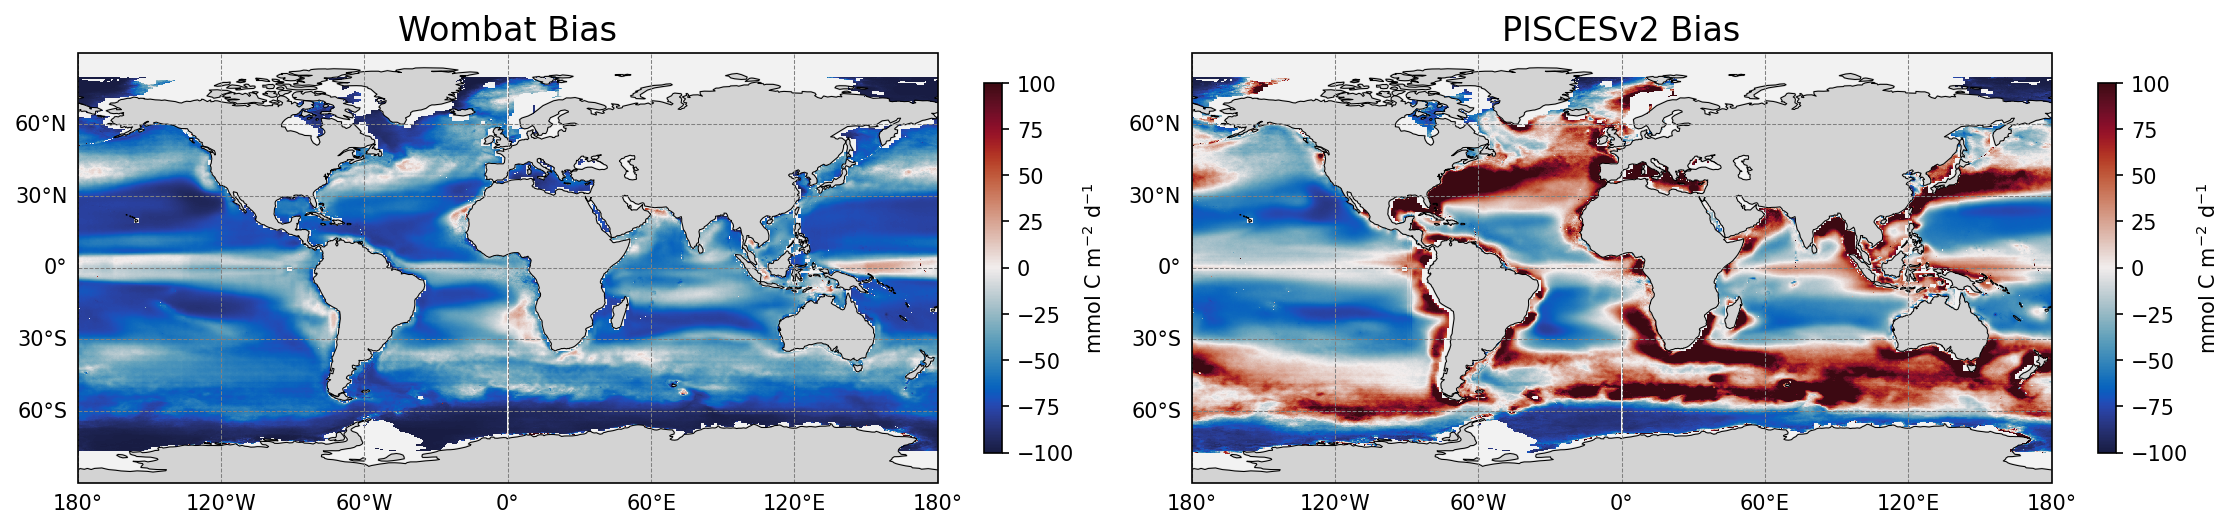

In [10]:
#### Part 2.3: Plot Mean Model Bias
#   - Compute the normalized model bias using the modeled and observed  annnual means computed abov.
#   - Percent Bias is equal to 100*(mod-obs)/obs
#   - Make sure to specify the units in the unitstr variable.

# Compute Annual Means using the regridded data
M1_Annual_Mean = NPP_model_1_rgt.mean(dim='time', skipna=True)
M2_Annual_Mean = NPP_model_2_rgt.mean(dim='time', skipna=True)
RS_Annual_Mean = NPP_obs.mean(dim='time', skipna=True)

# Compute the normalized model bias (Percent Bias = 100 * (mod - obs) / obs)
M1_Bias = 100 * (M1_Annual_Mean - RS_Annual_Mean) / RS_Annual_Mean
M2_Bias = 100 * (M2_Annual_Mean - RS_Annual_Mean) / RS_Annual_Mean
unitstr = '[mmol C/m^2 /day]'

# Set color bounds and color map
cbounds_1 = [-100,100]    #np.nanpercentile(M1_Bias.values.flatten(), [3, 97])
cbounds_2 = [-100,100]  #np.nanpercentile(M2_Bias.values.flatten(), [3, 97])

# ToDo: Choose a colourmap
cmap = plt.get_cmap('cmo.balance')  

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15,7),dpi=150, num=1, clear=True, subplot_kw={'projection': ccrs.PlateCarree()},)

# Subplot 1: Model 1 Bias
ax1 = axes[0]
im1 = ax1.pcolormesh(NPP_obs.lon, NPP_obs.lat, M1_Bias, cmap=cmap, vmin=cbounds_1[0], vmax=cbounds_1[1], transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, color="lightgray")
ax1.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax1.set_extent(global_extent, ccrs.PlateCarree())
ax1.set_facecolor([0.95, 0.95, 0.95])
gl = ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
gl.right_labels = False
gl.top_labels = False
# Add colorbar for subplot 1
cbar1 = fig.colorbar(im1, ax=ax1, orientation='vertical', fraction=0.02, pad=0.05)
cbar1.set_label('mmol C m$^{-2}$ d$^{-1}$')
ax1.set_title(f'{Name_Model_1} Bias', fontsize=16)

# Subplot 2: Model 2 Bias
ax2=axes[1]
im2 = ax2.pcolormesh(NPP_obs.lon, NPP_obs.lat, M2_Bias, cmap=cmap, vmin=cbounds_2[0], vmax=cbounds_2[1], transform=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, color="lightgray")
ax2.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax2.set_extent(global_extent, ccrs.PlateCarree())
ax2.set_facecolor([0.95, 0.95, 0.95])
gl = ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
gl.right_labels = False
gl.top_labels = False
# Add colorbar for subplot 2
cbar2 = fig.colorbar(im2, ax=ax2, orientation='vertical', fraction=0.02, pad=0.05)
cbar2.set_label('mmol C m$^{-2}$ d$^{-1}$')
ax2.set_title(f'{Name_Model_2} Bias', fontsize=16)

plt.tight_layout()
#plt.savefig(path + 'Bias_model.png')
plt.show()

### Section 3: Pick a region and look at the seasonal cycle
 Validating an entire model might be biting off a bit more than we can chew. Let’s focus on a smaller region of interest. Something big enough to average out the noise, but small enough to not average out the signal of interest. 

Here we will break things down by their seasonal average: December, January, February (DJF); March, April, May (MAM), and so on.  This 'lets us understand if the model is performing better or worse during any given part of the ye.1. 



******************
**Question 11:** Pick a region. What region did you pick? Why does it interest you? You can define the bounds of your region in Section 3.1 below. 
*********************

In [11]:
# Section 3.1: Pick a region and look at the seasonal cycle

# Step A. Pick a region
Min_lat, Max_lat = -60, -30
Min_lon, Max_lon = -120, -60

# Convert W from being -E to 180-360
if Min_lon < 0:
    Min_lon, Max_lon = 180 - Max_lon, 180 - Min_lon

# Slice out region of interest | Model 1
NPP_reg_model_1 = NPP_model_1_rgt.sel(lat=slice(Min_lat, Max_lat), lon=slice(Min_lon, Max_lon))
#Area_reg_model_1 = Area_obs.sel(lat=slice(Min_lat, Max_lat), lon=slice(Min_lon, Max_lon))

# Slice out region of interest | Model 2
NPP_reg_model_2 = NPP_model_2_rgt.sel(lat=slice(Min_lat, Max_lat), lon=slice(Min_lon, Max_lon))
#Area_reg_model_2 = Area_obs.sel(lat=slice(Min_lat, Max_lat), lon=slice(Min_lon, Max_lon))

# Slice out region of interest | Observations
NPP_reg_obs = NPP_obs.sel(lat=slice(Min_lat, Max_lat), lon=slice(Min_lon, Max_lon))
#Area_reg_obs = Area_obs.sel(lat=slice(Min_lat, Max_lat), lon=slice(Min_lon, Max_lon))

# Define months in each season
mon_i = [np.arange(42, 46).tolist() + np.arange(0, 8).tolist(),  # DJF
         np.arange(7, 19).tolist(),  # MAM
         np.arange(19, 31).tolist(),  # JJA
         np.arange(30, 42).tolist()]  # SON
       

# Set color bounds dynamically for all plots
cbounds = np.nanpercentile(np.concatenate([NPP_reg_model_1.values.flatten(), NPP_reg_model_2.values.flatten(), NPP_reg_obs.values.flatten()]), [5, 95])

print('Done creating subset')

Done creating subset


**********
**Question 12:** Compute the seasonally, and regionally integrated NPP and add it to each subpanel by modifying the code in the section below.
*******************

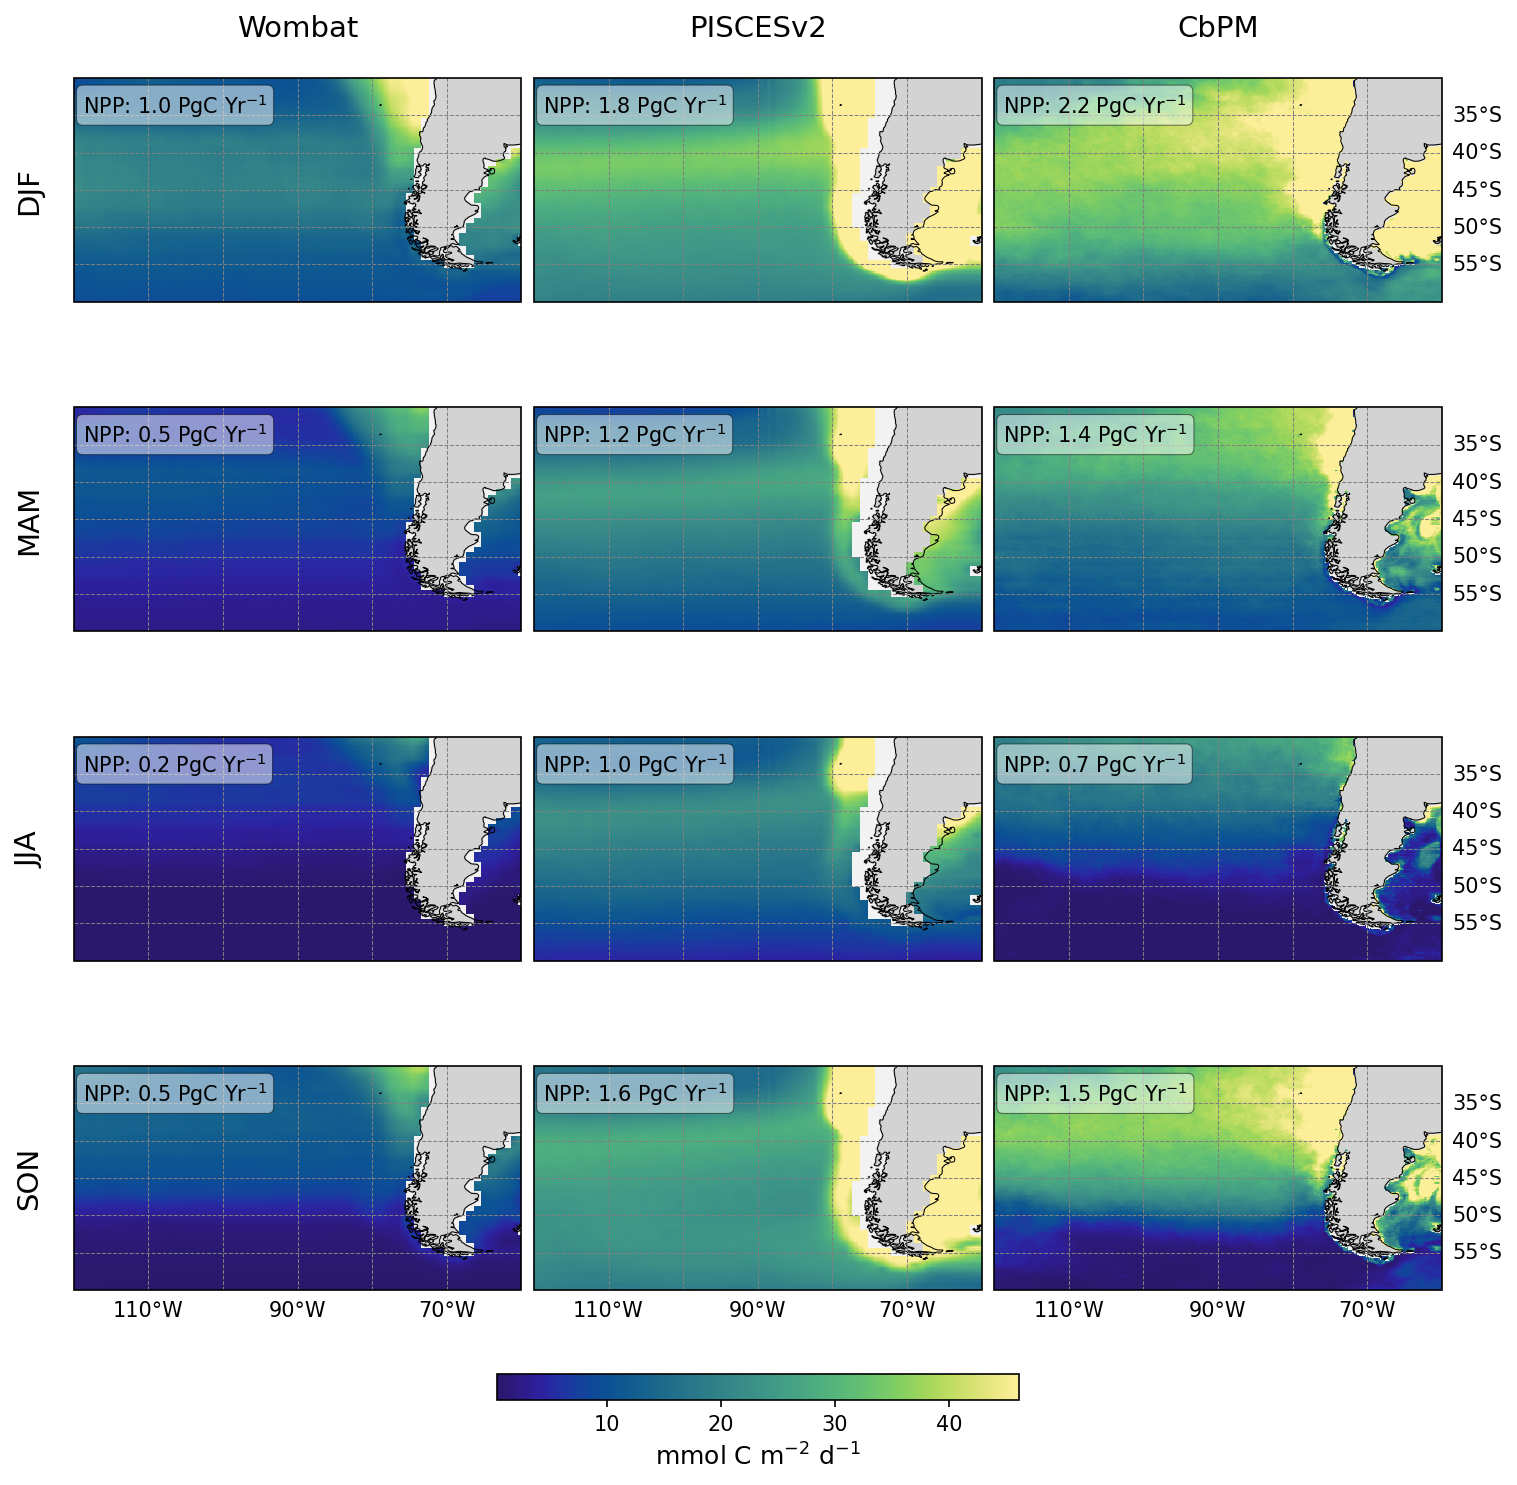

In [12]:
# Section 3.2
# Plotting of the data
# To Do: figsize might need adjusting depending on the lat/lon choice
fig, axs = plt.subplots(4, 3, figsize=(10, 10), constrained_layout=True, subplot_kw={'projection': ccrs.PlateCarree()}, num=1, clear=True, dpi=150)

# Add model names as column titles at the top
model_names = [Name_Model_1, Name_Model_2, Name_obs]
for i, model_name in enumerate(model_names):
    axs[0, i].set_title(model_name, fontsize=14, pad=20)

# Seasonal labels
seasons = ['DJF', 'MAM', 'JJA', 'SON']

# Loop through seasons
for season in range(4):
    # Compute seasonally averaged NPP
    Seas_NPP_model_1 = NPP_reg_model_1.isel(time=mon_i[season]).mean(dim='time', skipna=True)
    Seas_NPP_model_2 = NPP_reg_model_2.isel(time=mon_i[season]).mean(dim='time', skipna=True)
    Seas_NPP_obs = NPP_reg_obs.isel(time=mon_i[season]).mean(dim='time', skipna=True)
    
    # Compute seasonally integrated NPP
    M1_seasnpp = (Seas_NPP_model_1 * Area_obs).sum(dim=['lat', 'lon'], skipna=True) * 365 * 12 / 10**18
    M2_seasnpp = (Seas_NPP_model_2 * Area_obs).sum(dim=['lat', 'lon'], skipna=True) * 365 * 12 / 10**18
    OBS_seasnpp = (Seas_NPP_obs * Area_obs).sum(dim=['lat', 'lon'], skipna=True) * 365 * 12 / 10**18
    seas_npp = [M1_seasnpp, M2_seasnpp, OBS_seasnpp]

    # Loop through models
    for col, (model_data, seas_npp_val) in enumerate(zip([Seas_NPP_model_1, Seas_NPP_model_2, Seas_NPP_obs], seas_npp)):
        ax = axs[season, col]
        
        # Set map features
        ax.add_feature(cfeature.LAND, color="lightgray")
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
        ax.set_extent([Min_lon, Max_lon, Min_lat, Max_lat], crs=ccrs.PlateCarree())
        ax.set_facecolor([0.95, 0.95, 0.95])
        
        # Gridlines and labels
        gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
        gl.right_labels = col == 2  # Only show lat labels in the rightmost column
        gl.top_labels = False
        gl.left_labels = False
        gl.bottom_labels = season == 3  # Only show lon labels in the bottom row
        
        # Plot data
        im = ax.pcolormesh(NPP_reg_model_1.lon, NPP_reg_model_1.lat, model_data, cmap=cmocean.cm.haline, vmin=cbounds[0], vmax=cbounds[1])
        
        # Integrated NPP label in each plot
        ax.annotate(f'NPP: {seas_npp_val:.1f} PgC Yr$^{{-1}}$', xy=(0.02, 0.94), xycoords='axes fraction',
                    ha='left', va='top', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5, alpha =0.5))
    
    # Add seasonal label to the leftmost column
    axs[season, 0].annotate(seasons[season], xy=(-0.1, 0.5), xycoords='axes fraction',
                            ha='center', va='center', fontsize=14, rotation=90)

# Add colorbar across the whole figure
cbar = fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.02, pad=0.04)
cbar.set_label('mmol C m$^{-2}$ d$^{-1}$', fontsize=12)

# Save and show
# plt.savefig(path + 'Seasonal_NPP_maps.png', dpi=300)
plt.show()


Still, there is a lot going on. Run Section 3.3 of the code below to plot the spatially averaged seasonal cycle for each data set. Think about how they compare.  
There is also a a set of summary statistics to help quantify your intuition. Have a look at the Description of Statistical Metrics Table online on the Mylo webpage for a definition of each statistic and the underlying math and interpretati.on


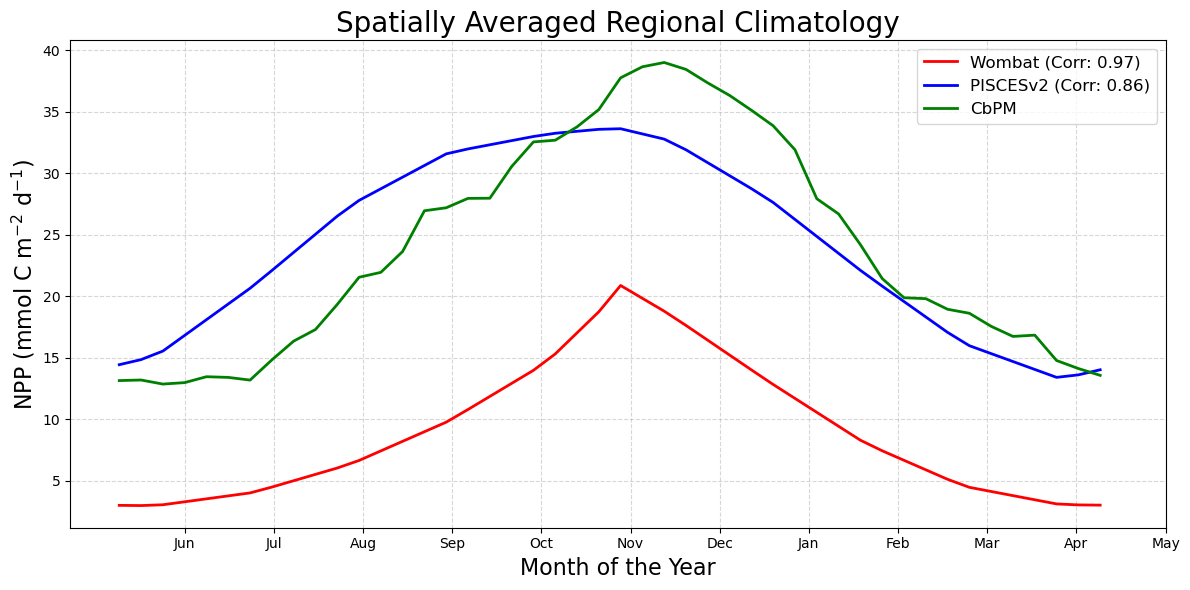


Summary Statistics:

              CbPM  Wombat  PISCESv2
mean         23.95    8.97     24.30
Bias          0.00  -14.98      0.35
Norm. Bias    0.00   -0.63      0.01
STD           8.73    5.42      7.06
Norm. STD     1.00    0.62      0.81
RMSE          0.00   15.42      4.50
Norm. RMSE    0.00    1.77      0.52
cRMSE         0.00    3.66      4.49
Norm. cRMSE   0.00    0.42      0.51
Corr. Coeff   1.00    0.97      0.86


<Figure size 640x480 with 0 Axes>

In [13]:
# Section 3.3. Plot spatially averaged, mean seasonal cycle

# Define monthly index for Remote Sensing Grid
Mon_yticks = np.linspace(1,46,12)+2 # because of the 45 temporal resolution
Mon_ylabel = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Make time series
Reg_TS_model_1 = NPP_reg_model_1.mean(dim=['lat','lon'])
Reg_TS_model_2 = NPP_reg_model_2.mean(dim=['lat','lon'])
Reg_TS_obs = NPP_reg_obs.mean(dim=['lat','lon'])

# Shift by 6 months if in Southern Hemisphere
if np.mean([Min_lat, Max_lat]) < 0:
    Reg_TS_model_1 = np.roll(Reg_TS_model_1, 23)
    Reg_TS_model_2 = np.roll(Reg_TS_model_2, 23)
    Reg_TS_obs = np.roll(Reg_TS_obs, 23)
    Mon_ylabel = np.roll(Mon_ylabel, 7)

# Calculate stats
stats_model_1 = allstats(Reg_TS_obs, Reg_TS_model_1)
stats_model_2 = allstats(Reg_TS_obs, Reg_TS_model_2)

# Plot
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
ax.plot(Reg_TS_model_1, 'r', linewidth=2, label=f'{Name_Model_1} (Corr: {stats_model_1[3, 1]:.2f})')
ax.plot(Reg_TS_model_2, 'b', linewidth=2, label=f'{Name_Model_2} (Corr: {stats_model_2[3, 1]:.2f})')
ax.plot(Reg_TS_obs, 'g', linewidth=2, label=f'{Name_obs}')

# Customize axes
ax.set_ylabel('NPP (mmol C m$^{-2}$ d$^{-1}$)', fontsize=16)
ax.set_xlabel('Month of the Year', fontsize=16)
ax.set_xticks(Mon_yticks)
ax.set_xticklabels(Mon_ylabel)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title('Spatially Averaged Regional Climatology', fontsize=20)
plt.tight_layout()
plt.show()

# Compute Summary Statistics

RMSE = [np.sqrt(np.mean(( Reg_TS_obs - Reg_TS_obs)**2)),
        np.sqrt(np.mean(( Reg_TS_model_1 - Reg_TS_obs)**2)),
        np.sqrt(np.mean((Reg_TS_model_2 - Reg_TS_obs)**2))]

# Statistics Calculations
u = np.hstack([stats_model_1[0, :], stats_model_2[0, 1]])
e = u - stats_model_1[0, 0]
ne = e / stats_model_1[0, 0]
STDs = np.hstack([stats_model_1[1, :], stats_model_2[1, 1]])
nSTDs = STDs / stats_model_1[1, 0]
RMSEs = RMSE
nRMSEs = RMSE / stats_model_1[1, 0]
cRMSEs = np.hstack([stats_model_1[2, :], stats_model_2[2, 1]])
ncRMSEs = cRMSEs / stats_model_1[1, 0]
CORs = np.hstack([stats_model_1[3, :], stats_model_2[3, 1]])

# Create Summary Table
ms = np.round(np.array([u, e, ne, STDs, nSTDs, RMSEs, nRMSEs, cRMSEs, ncRMSEs, CORs]) * 100) / 100
StatNames = ['mean', 'Bias', 'Norm. Bias', 'STD', 'Norm. STD', 'RMSE', 'Norm. RMSE', 'cRMSE', 'Norm. cRMSE', 'Corr. Coeff']
ModelNames = [obs[1], m_1[1], m_2[1]]
T = pd.DataFrame(ms, columns=ModelNames, index=StatNames)

# Display the Summary Statistics Table
print("\nSummary Statistics:\n")
print(T)

# Add table to the plot
plt.figtext(0.65, 0.55, T.to_string(), fontsize=10, family='monospace', bbox=dict(facecolor='lightgrey', alpha=0.5))
plt.figtext(0.785, 0.9, 'Summary Statistics', fontsize=12, weight='bold')
plt.show()

# Taylor Diagram TBC


********************
**Question 13:**  Which model recreates the regionally averaged seasonal cycle in the remote sensing record best? Support your conclusion statistically. Note, there may be trade-offs worth noting between various statistics. 
*****************************

It also important to think about the ecological significance of these time series. Phenology refers to the timing of biological cycles. With respect to phytoplankton productivity in the ocean, it typically refers to the seasonal timing of things like the initiation of the blooming period (i.e. when biomass begins to accumulate after winter) and the peak NPP.

********************
**Question 14:**  Describe quantitatively how well the model phenology agrees with the observed phenology. A) Specifically, how well aligned in the timing of peak NPP? B) Can you say precisely when bloom initiation begins from these data sets alone? If not, how might you approximate it.
************************

Now, notice in the bottom right corner of the figure, below the summary statistics is a funny looking diagram. This is called a Taylor diagram. It is a handy way of comparing three statistics at once: the normalized, centred root mean square error (ncRMSE), the normalized standard deviation (nSTD), and the correlation coefficient (r). Note, I have highlighted all three in the summary table in the figure. 

•	The normalized standard deviation (nSTD) is plotted as the distance between the model data point and the origin of the graph. A value >1 (or <1) means the standard deviation of the model is greater (or smaller) than the standard deviation of the observations. That is, there is more or less variance. When normalized, a value of 1 means the model and obs have the same STD. Ecologically, this could imply the amplitude of the seasonal cycle is greater or smaller than that of the observations, respectively. 

•	The correlation coefficient (r) is plotted as the angle from the x-axis. A correlation coefficient closer to 1 means the model covaries more with the observations. In other words, the time series move up and down at the same time and by the same amount relative to their respective standard deviations. Ecologically, a strong correlation could imply they have similar phenologies. That is, NPP begins to increase and decrease at the same time of the year.

•	The normalized, centred root mean square error (ncRMSE), is plotted as the absolute distance between the model data point and the observed data point. Further away means more error. Importantly though, the cRMSE is centered, meaning the mean value of each seasonal cycle has remove. My definition, this means it does not reflect the model bias (i.e. the difference in the means). Thus, the ncRMSE reflects the combination of discrepancies in the size of the variance (i.e. nSTD) and alignment of variance (i.e. r), but not any differences in the mean values. When normalized, the size of the error is expressed relative to the size of the observed STD. Ecologically, this is a useful summary statistic of how well the patterns of variance match between model and observations. Importantly though, it says nothing about bias or differences in the mean state. 

Finally, note the location of the point describing the observed timeseries. It always falls on the x-axis because its correlation with itself is always 1. Here, because we’ve normalized the data, it also has a nSTD of 1. This is because its STD is divided (i.e. normalized) by itself. 

To learn more about Taylor Diagrams check out this helpful primer. Note, in their example, they don’t normalize the cRMSE or STDs, meaning the observed data point doesn’t fall on a value of 1. The benefit of normalize the data is that you can plot different metrics with different units on the same plot.


***********
**Question 15:** Despite having two dimensions, three statistics are plotted in the Taylor Diagram: the normalized standard deviation, the correlation coefficient and the ncRMSE. How is this possible? Hint. Check out the equations of the primer provided above. 
********************

Finally, you may be interested in spatial variability in model performance. For example, if your region is large and includes a highly dynamic boundary current you may notice substantial differences in model performance depending where you look. 

Because we have regridded the model and observed data sets it is possible to compute identical statistics to the ones described above, but instead of comparing the spatially averaged timeseries, we can compare the timeseries individually at each grid cell and plot their performance.

Run Section 3.4 and below 3.5 to compute and plot the spatial distribution of the three ‘Taylor Statistics’ described above. 


In [14]:
# Section 3.: Create spatial distribution of Model Skill Metrics  

# Initialize Model_Skill array (2 models, 3 metrics, lat, lon grid)
Model_Skill = np.zeros((2, 3, NPP_reg_model_2.sizes["lat"], NPP_reg_model_2.sizes["lon"]))

# Stack spatial dimensions for easier broadcasting
obs_stacked = NPP_reg_obs.stack(space=("lat", "lon"))

# Loop through models (1 and 2)
for m, SIM_Data in enumerate([NPP_reg_model_1, NPP_reg_model_2]):
    print(f'\nCreating spatial distribution of Taylor statistics for model m = {m+1}')

    # Stack spatial dimensions
    sim_stacked = SIM_Data.stack(space=("lat", "lon"))

    # 1. Normalized Centered RMSE
    mean_obs = obs_stacked.mean("time", skipna=True)
    mean_sim = sim_stacked.mean("time", skipna=True)
    centered_rmse = (np.sqrt(((sim_stacked - mean_sim) - (obs_stacked - mean_obs))**2)/ obs_stacked.std("time", skipna=True)).mean(dim='time')
    
    # 2. Correlation Coefficient
    c = xr.corr(obs_stacked, sim_stacked, dim="time")

    # 3. Annual STD Bias
    std_bias = sim_stacked.std("time", skipna=True) / obs_stacked.std("time", skipna=True)

    # Unstack back to original grid shape
    Model_Skill[m, 0, :, :] = centered_rmse.unstack("space").values
    Model_Skill[m, 1, :, :] = c.unstack("space").values
    Model_Skill[m, 2, :, :] = std_bias.unstack("space").values

print("\nFinished. Move to Section 3.5 to plot!\n")




Creating spatial distribution of Taylor statistics for model m = 1

Creating spatial distribution of Taylor statistics for model m = 2

Finished. Move to Section 3.5 to plot!



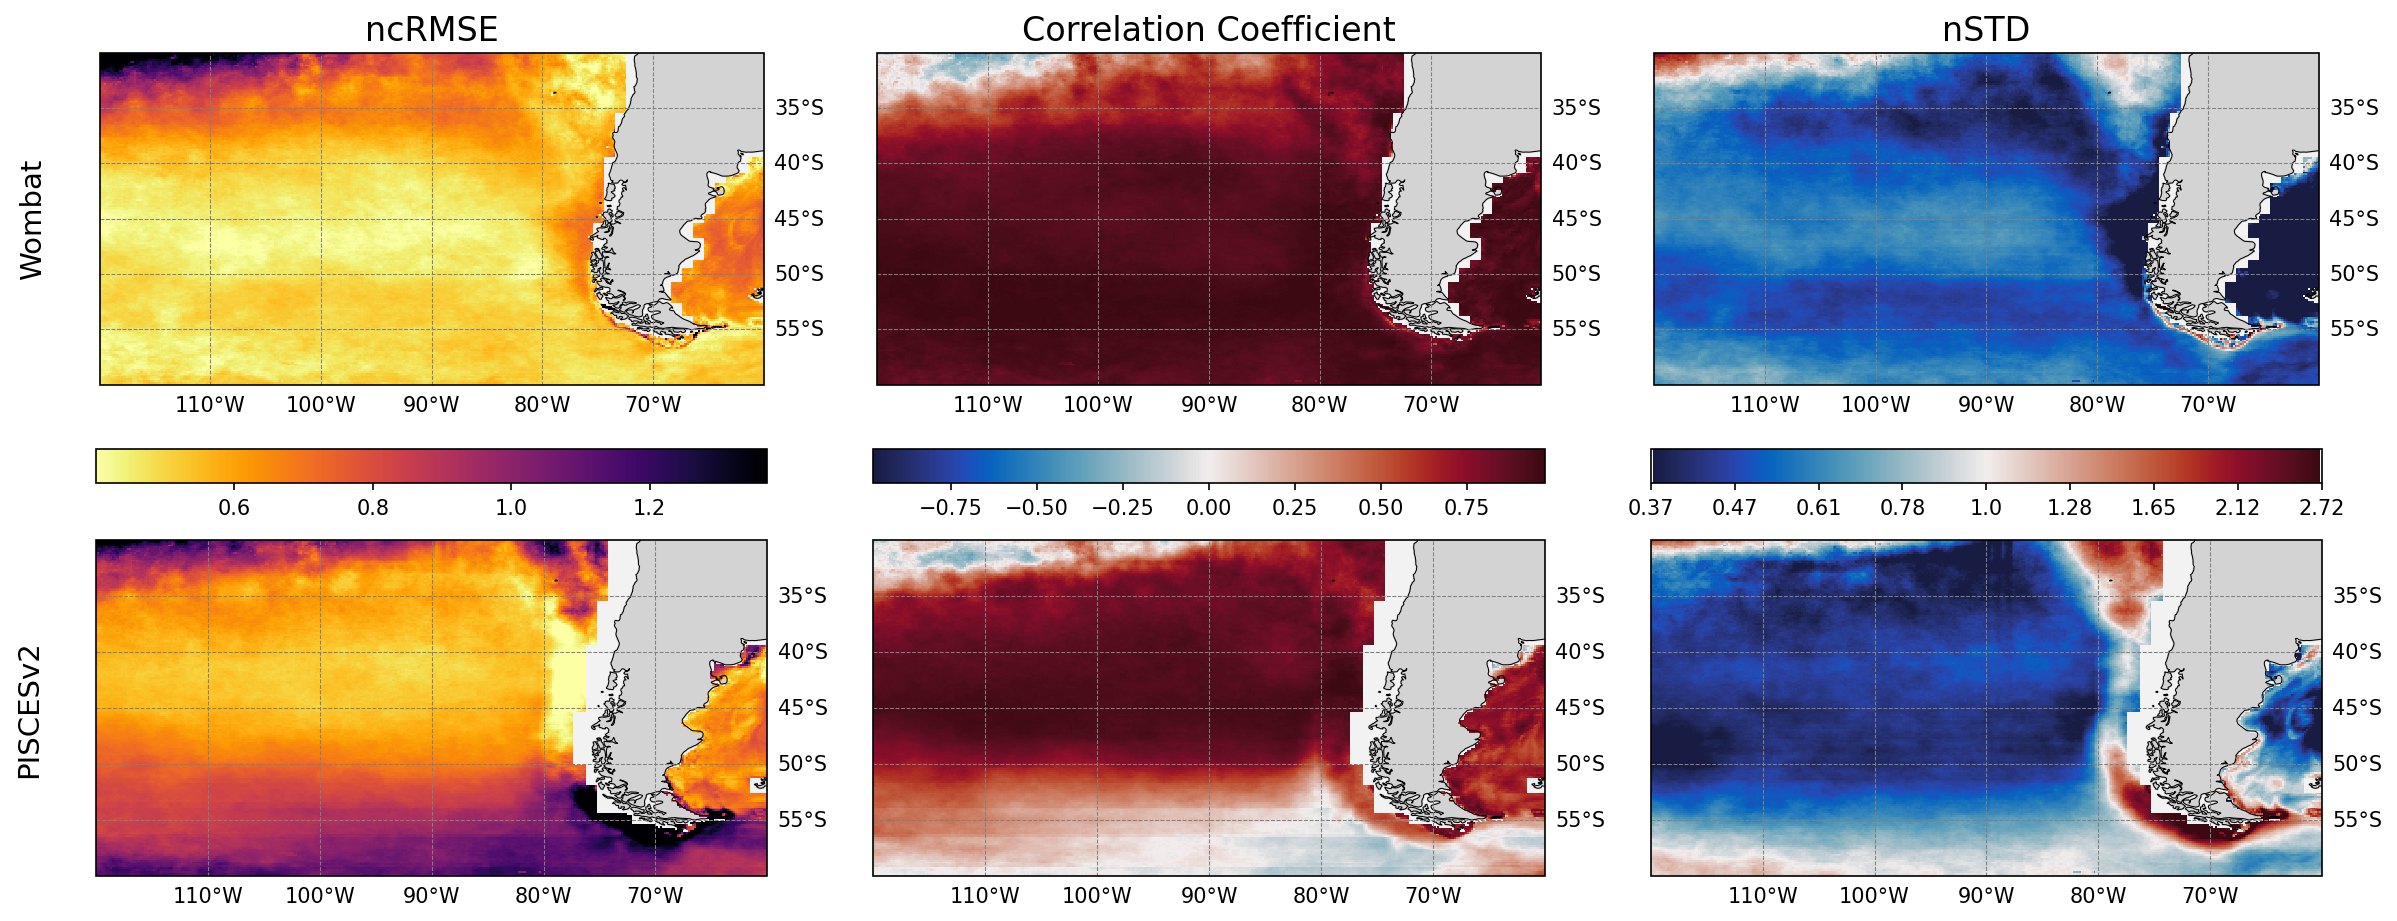

In [15]:
# Part 3.5 Plot spatial distribution of Model Skill Metrics 

# Set up the figure
fig, axs = plt.subplots(2, 3, figsize=(16, 7), subplot_kw={'projection': ccrs.PlateCarree()}, dpi=150, num=1, clear=True)

# Dynamic Colorbounds
cbounds1 = np.nanpercentile(Model_Skill[:, 0, :, :], [1, 99])
cbounds2 = np.nanpercentile(Model_Skill[:, 1, :, :], [1, 99])
cbounds2 = [-max(abs(cbounds2)), max(abs(cbounds2))]
cbounds3 = np.nanpercentile(np.log(Model_Skill[:, 2, :, :]), [5, 95])
cbounds3 = [-max(abs(cbounds3)), max(abs(cbounds3))]

# Plot settings
titles = ['ncRMSE', 'Correlation Coefficient', 'nSTD']
cbounds = [cbounds1, cbounds2, cbounds3]
cmaps = ['inferno_r', 'cmo.balance', 'cmo.balance']

# Loop through models and metrics
for model in range(2):
    for metric in range(3):
        ax = axs[model, metric]
        
        # Map setup
        ax.add_feature(cfeature.LAND, color="lightgray")
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
        ax.set_extent([Min_lon, Max_lon, Min_lat, Max_lat], ccrs.PlateCarree())
        ax.set_facecolor([0.95, 0.95, 0.95])

        # Gridlines
        gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
        gl.left_labels = False
        gl.top_labels = False

        # Plot data (apply log for nSTD)
        data = np.log(Model_Skill[model, metric]) if metric == 2 else Model_Skill[model, metric]
        p = ax.pcolormesh(NPP_reg_model_2.lon, NPP_reg_model_2.lat, data, cmap=cmaps[metric], vmin=cbounds[metric][0], vmax=cbounds[metric][1])

        # Titles and labels
        if model == 0:
            ax.set_title(titles[metric], fontsize=16)
            ax.set_ylabel(ModelNames[model +1])
        if metric == 0:
            ax.annotate(ModelNames[model +1], xy=(-0.1, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=14, rotation=90)
        
        # Add one colorbar per column
        if model == 0:
            cb = plt.colorbar(p, orientation='horizontal', fraction=0.08)           
            # Adjust nSTD colorbar ticks to show original scale
            if metric == 2:
                cb.set_ticks(cb.get_ticks())
                cb.set_ticklabels([round(np.exp(val) * 100) / 100 for val in cb.get_ticks()])

# Show the plot
plt.tight_layout(rect=[0, 0.1, 1, 1])
# plt.savefig(path + 'model_obs_correlation.jpg')
plt.show()


*************
**Question 16:**  Where does your model perform best and why? In the regions where it performs worst does the model appear to mostly be misrepresenting the phenology (i.e. the timing or alignment) of the seasonal cycle or the amplitude (i.e. the amount of variance) of the seasonal cycle?
***************

**************
**Bonus Question:** Can you make a new plot showing the bias in the magnitude of the peak annual NPP? 
****************

*************************************************
The End
************************************************

In [ ]:
# Appendix.

# Reference: https://github.com/saeed81/TaylorDiagram/blob/master/taylorDiagram.py

def TaylorDiagram(RMSVEC, RMSDVEC, CORVEC,COLORVEC,LABELVEC):
    import numpy as np
    import matplotlib.pyplot as plt
    import math

    ######################################################
    rms_max  = max(RMSVEC)
    delta    = rms_max/10.0
    rmsd_max = max(RMSDVEC)
    ddelta   = rmsd_max/10.0
    ######################################################
    X=np.arange(0.0,(1.20)*rms_max+delta,delta/200.0)
    Y=np.arange(0.0,(1.20)*rms_max+delta,delta/200.0)
    nx,=X.shape
    ny,=Y.shape
    XX, YY = np.meshgrid(X,Y)
    h  = np.zeros((ny,nx),dtype=np.float32)
    hh = np.zeros((ny,nx),dtype=np.float32)
    h  = np.sqrt(XX * XX + YY * YY)
    hmax = np.amax(h)
    hmax = X[-1] - delta
    hh[:,:] = -1.0
    hh = np.sqrt((XX-RMSVEC[0])*(XX-RMSVEC[0]) + YY * YY)
    hh[h > hmax ] = -1.0
    hh=np.ma.masked_where(hh==-1.0,hh)
    ######################################################
    fig=plt.figure(num=1,figsize=(9.0,9.0),dpi=300,facecolor='w',edgecolor='k')
    ax = fig.add_axes([0.08, 0.08, 0.8, 0.8], facecolor = '1.0')
    ax.set_xlabel('Standard Deviation',fontsize='15',weight='bold',color="green")
    ax.set_ylabel('Standard Deviation',fontsize='15',weight='bold',color="green")
    ax.grid(False)
    #######################################################
    vvc=np.arange(0.0,rmsd_max+ddelta,ddelta)
    crm=ax.contour(XX,YY,hh,vvc[::2],colors='lightgreen',linestyles="solid",linewidths=1.5)
    ax.clabel(crm,vvc[::2],inline=1,fontsize=12,colors='k',fmt='%.2f') 
    ############################################
    vc=np.arange(0.0,X[-1],delta)
    nl, = vc.shape
    lines=[]
    for i in range(nl-1):
        lines.append("dashed")
    lines.append("solid")
    ax.contour(XX,YY,h,vc,colors='0.5',linestyles=lines,linewidths=0.2)
    ########################################
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.set_xlim(0.0,X[-1]+delta/200.0)
    #ax.set_ylim(0.0,Y[-1]+delta/200.0)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(0.5)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ############################################
    radius = np.arange(0.0,X[-1],delta)
    xangle = list(np.arange(0.0,0.9,0.10)) + [0.9, 0.95, 0.99]
    rdmax = np.amax(radius)
    for rd in radius:  
        for ang in xangle:
            ax.plot([0.0,rd*ang],[0.0,rd*math.sqrt(1.0 - (ang * ang))],color="0.5",ls="-",lw="0.10")
            if rd == rdmax and ang > 0.0: ax.text(rd*ang, rd*math.sqrt(1.0 - (ang * ang)), str(ang),fontsize=10) 
    ############################################
    ang = 0.65
    ax.text((1.040)*rdmax*ang, (1.04)*rdmax*math.sqrt(1.0 - (ang * ang)), "Correlation",color="Steelblue",fontsize=20,rotation=-45)
    ############################################
    lenm = len(RMSVEC) 
    for ii in range(lenm):
        vrms, vcor, vcol, vlab =  RMSVEC[ii], CORVEC[ii], COLORVEC[ii],LABELVEC[ii]
        if ii == 0 : 
            line, = ax.plot(vrms*vcor,vrms*math.sqrt(1.0 - (vcor * vcor)),'o',color=vcol, label=vlab,ms=8)
            line.set_clip_on(False)
            #ax.text(rms_max/10.0, -rms_max/8.0, "STD_OBS  "+str(vrms),color="red",fontsize=12,rotation=0)
        else:ax.plot(vrms*vcor,vrms*math.sqrt(1.0 - (vcor * vcor)),'o',color=vcol, label=vlab,ms=8)

    ax.legend(numpoints=1,loc = 'best',prop=dict(size='small'),fontsize=12)
   
 #   print ("creating "+"taylor"+station+".png")
  
    plt.show(1)
    #############################################


col  = ["b","g","r","k"]

TaylorDiagram(RMSVEC=CORs, RMSDVEC = STDs, CORVEC = RMSEs, COLORVEC=col,LABELVEC = ModelNames)

# Reference: https://github.com/saeed81/TaylorDiagram/blob/master/taylorDiagram.py

def TaylorDiagram(RMSVEC, RMSDVEC, CORVEC,COLORVEC,LABELVEC):
    import numpy as np
    import matplotlib.pyplot as plt
    import math

    ######################################################
    rms_max  = max(RMSVEC)
    delta    = rms_max/10.0
    rmsd_max = max(RMSDVEC)
    ddelta   = rmsd_max/10.0
    ######################################################
    X=np.arange(0.0,(1.20)*rms_max+delta,delta/200.0)
    Y=np.arange(0.0,(1.20)*rms_max+delta,delta/200.0)
    nx,=X.shape
    ny,=Y.shape
    XX, YY = np.meshgrid(X,Y)
    h  = np.zeros((ny,nx),dtype=np.float32)
    hh = np.zeros((ny,nx),dtype=np.float32)
    h  = np.sqrt(XX * XX + YY * YY)
    hmax = np.amax(h)
    hmax = X[-1] - delta
    hh[:,:] = -1.0
    hh = np.sqrt((XX-RMSVEC[0])*(XX-RMSVEC[0]) + YY * YY)
    hh[h > hmax ] = -1.0
    hh=np.ma.masked_where(hh==-1.0,hh)
    ######################################################
    fig=plt.figure(num=1,figsize=(9.0,9.0),dpi=300,facecolor='w',edgecolor='k')
    ax = fig.add_axes([0.08, 0.08, 0.8, 0.8], facecolor = '1.0')
    ax.set_xlabel('Standard Deviation',fontsize='15',weight='bold',color="green")
    ax.set_ylabel('Standard Deviation',fontsize='15',weight='bold',color="green")
    ax.grid(False)
    #######################################################
    vvc=np.arange(0.0,rmsd_max+ddelta,ddelta)
    crm=ax.contour(XX,YY,hh,vvc[::2],colors='lightgreen',linestyles="solid",linewidths=1.5)
    ax.clabel(crm,vvc[::2],inline=1,fontsize=12,colors='k',fmt='%.2f') 
    ############################################
    vc=np.arange(0.0,X[-1],delta)
    nl, = vc.shape
    lines=[]
    for i in range(nl-1):
        lines.append("dashed")
    lines.append("solid")
    ax.contour(XX,YY,h,vc,colors='0.5',linestyles=lines,linewidths=0.2)
    ########################################
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.set_xlim(0.0,X[-1]+delta/200.0)
    #ax.set_ylim(0.0,Y[-1]+delta/200.0)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(0.5)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ############################################
    radius = np.arange(0.0,X[-1],delta)
    xangle = list(np.arange(0.0,0.9,0.10)) + [0.9, 0.95, 0.99]
    rdmax = np.amax(radius)
    for rd in radius:  
        for ang in xangle:
            ax.plot([0.0,rd*ang],[0.0,rd*math.sqrt(1.0 - (ang * ang))],color="0.5",ls="-",lw="0.10")
            if rd == rdmax and ang > 0.0: ax.text(rd*ang, rd*math.sqrt(1.0 - (ang * ang)), str(ang),fontsize=10) 
    ############################################
    ang = 0.65
    ax.text((1.040)*rdmax*ang, (1.04)*rdmax*math.sqrt(1.0 - (ang * ang)), "Correlation",color="Steelblue",fontsize=20,rotation=-45)
    ############################################
    lenm = len(RMSVEC) 
    for ii in range(lenm):
        vrms, vcor, vcol, vlab =  RMSVEC[ii], CORVEC[ii], COLORVEC[ii],LABELVEC[ii]
        if ii == 0 : 
            line, = ax.plot(vrms*vcor,vrms*math.sqrt(1.0 - (vcor * vcor)),'o',color=vcol, label=vlab,ms=8)
            line.set_clip_on(False)
            #ax.text(rms_max/10.0, -rms_max/8.0, "STD_OBS  "+str(vrms),color="red",fontsize=12,rotation=0)
        else:ax.plot(vrms*vcor,vrms*math.sqrt(1.0 - (vcor * vcor)),'o',color=vcol, label=vlab,ms=8)

    ax.legend(numpoints=1,loc = 'best',prop=dict(size='small'),fontsize=12)
   
 #   print ("creating "+"taylor"+station+".png")
  
    plt.show(1)
    #############################################


col  = ["b","g","r","k"]

TaylorDiagram(RMSVEC=CORs, RMSDVEC = STDs, CORVEC = RMSEs, COLORVEC=col,LABELVEC = ModelNames)
def taylor_diagram(obs_std, stds, cors, model_names, colors=None):
    import matplotlib.pyplot as plt
    import numpy as np

    fig = plt.figure(figsize=(8, 8), dpi=100)
    ax = fig.add_subplot(1, 1, 1, polar=True)
    ax.set_theta_zero_location('E')
    ax.set_theta_direction(+1)

    # Set correlation angles
    angles = np.arccos(cors)
    angles = np.clip(angles, 0, np.pi/2)  # Ensures we stay within the first quadrant

    # Set radial (STD) axis
    max_std = max(np.max(stds), obs_std) * 1.1
    ax.set_ylim(0, max_std)
    ax.set_yticks(np.linspace(0, max_std, 5))
    ax.yaxis.set_tick_params(labelsize=10)
    ax.set_yticklabels(np.round(np.linspace(0, max_std, 5), 2), fontsize=10)

    # Draw correlation lines
    cor_values = [0.5, 0.7, 0.8, 0.9, 0.95, 0.99]
    for cor in cor_values:
        angle = np.arccos(cor)
        ax.plot([angle, angle], [0, max_std], linestyle='--', color='gray', alpha=0.5)

    # Plot the models
    for i, (std, angle, name) in enumerate(zip(stds, angles, model_names)):
        ax.scatter(angle, std, color='red', s=50)
        ax.text(angle, std, f' {name}', color='red', weight='bold', fontsize=12, ha='left')

    # Reference observation
    ax.scatter(0, obs_std, color='black', s=50)

    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Axis labels
    ax.set_xlabel('Correlation Coefficient', fontsize=12, color='gray')
    ax.set_ylabel('nSTD', fontsize=12)

    plt.show()

taylor_diagram(STDs[0], STDs, CORs, ModelNames, colors=None)
